In [1]:
import pandas as pd
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector
from src.helpers.plotters import plot_corr_matrix

In [2]:
df_dropped = pd.read_csv('../cleaned/output_ebay_dropped.csv')
df_dropped.head()

,price_pln,handheld,home_console,generation,seller_num_comments,seller_rating,condition_num,seller_score,collectible
0,327.48,0,1,6,1078,99.9,1,0.736873,0
1,286.38,0,1,6,280,100.0,1,0.692709,0
2,511.71,0,1,6,107,100.0,1,0.660797,0
3,532.18,0,1,6,108,100.0,1,0.661105,0
4,286.58,0,1,6,67,100.0,1,0.645358,0


In [3]:
df_encoded = pd.read_csv('../cleaned/output_ebay_encoded.csv')
df_encoded.head()

,condition,country,model,sale_date,title,price_pln,producer,model_group,handheld,home_console,generation,seller_name,seller_num_comments,seller_rating,region,condition_num,seller_score,collectible
0,537.638262,575.592766,435.897022,590.083431,552.881011,327.48,562.280699,435.897022,0,1,6,513.254053,1078,99.9,576.733207,1,0.736873,0
1,537.638262,575.592766,435.897022,590.083431,535.810807,286.38,562.280699,435.897022,0,1,6,614.563048,280,100.0,576.733207,1,0.692709,0
2,537.638262,575.592766,435.897022,590.083431,579.242835,511.71,562.280699,435.897022,0,1,6,488.247650,107,100.0,576.733207,1,0.660797,0
3,537.638262,575.592766,435.897022,590.083431,579.514216,532.18,562.280699,435.897022,0,1,6,546.338155,108,100.0,576.733207,1,0.661105,0
4,537.638262,575.592766,435.897022,590.083431,547.559575,286.58,562.280699,435.897022,0,1,6,547.559575,67,100.0,576.733207,1,0.645358,0


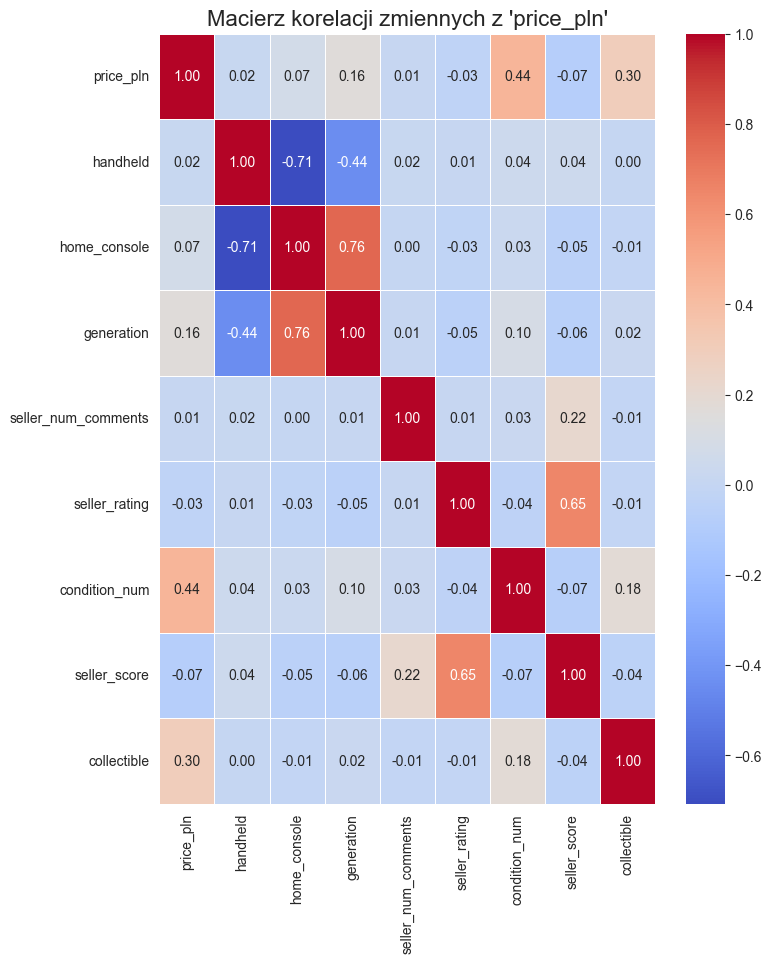

In [4]:
plot_corr_matrix(df_dropped)

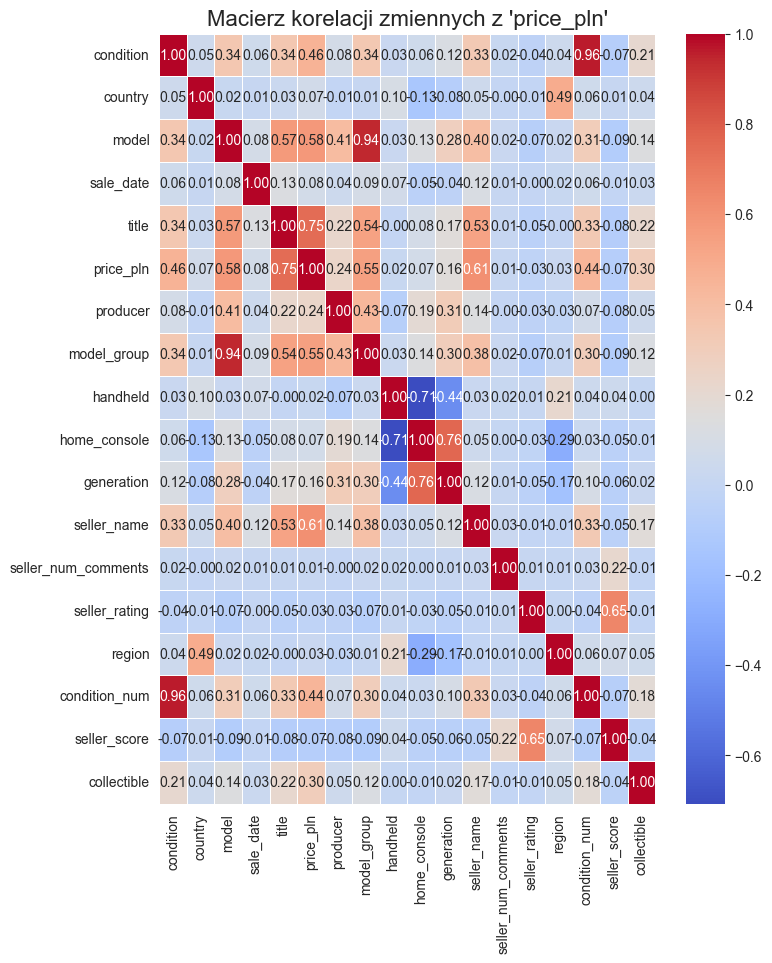

In [5]:
plot_corr_matrix(df_encoded)

In [6]:
y_dropped = df_dropped['price_pln']
X_dropped = df_dropped.drop(columns=['price_pln'])
X_train_dropped, X_test_dropped, y_train_dropped, y_test_dropped = train_test_split(X_dropped, y_dropped, test_size=0.2, random_state=42)


y_encoded = df_encoded['price_pln']
X_encoded = df_encoded.drop(columns=['price_pln'])
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

X_dropped.head()


,handheld,home_console,generation,seller_num_comments,seller_rating,condition_num,seller_score,collectible
0,0,1,6,1078,99.9,1,0.736873,0
1,0,1,6,280,100.0,1,0.692709,0
2,0,1,6,107,100.0,1,0.660797,0
3,0,1,6,108,100.0,1,0.661105,0
4,0,1,6,67,100.0,1,0.645358,0


In [7]:
ln = LinearRegression()

for i in range(1, df_dropped.shape[1]):
    forward_dropped = SequentialFeatureSelector(
        ln,
        k_features=10,
        forward=True,
        verbose=1
    )
    back_dropped = SequentialFeatureSelector(
        ln,
        k_features=10,
        forward=False,
        verbose=1
    )

    sf_forward_dropped = forward_dropped.fit(X_dropped, y_dropped)
    sf_back_dropped = back_dropped.fit(X_dropped, y_dropped)
    print(str(i) + " forward_k_score " + str(sf_forward_dropped.k_score_) + " backward_k_score " + str(sf_back_dropped.k_score_))
    print(list(sf_forward_dropped.k_feature_names_))
    print(list(sf_forward_dropped.k_feature_names_))

Features: 4/4

In [10]:
for i in range(1, df_dropped.shape[1]):
    forward_encoded = SequentialFeatureSelector(
        ln,
        k_features=4,
        forward=True,
        verbose=1
    )

    back_encoded = SequentialFeatureSelector(
        ln,
        k_features=4,
        forward=False,
        verbose=1
    )
    sf_back_encoded = back_encoded.fit(X_encoded, y_encoded)
    sf_forward_encoded = back_encoded.fit(X_encoded, y_encoded)
    print(str(i) + " forward_k_score " + str(sf_forward_encoded.k_score_) + " backward_k_score " + str(sf_back_encoded.k_score_))
    print(list(sf_forward_encoded.k_feature_names_))
    print(list(sf_back_encoded.k_feature_names_))

Features: 4/44

In [18]:
import statsmodels.api as sm
regressor_OLS_dropped = sm.OLS(endog=y_train_dropped,exog=X_train_dropped[['handheld', 'generation', 'condition_num', 'collectible']]).fit()
regressor_OLS_dropped.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              price_pln   R-squared (uncentered):                   0.613
Model:                            OLS   Adj. R-squared (uncentered):              0.613
Method:                 Least Squares   F-statistic:                          5.809e+04
Date:                Tue, 28 Jan 2025   Prob (F-statistic):                        0.00
Time:                        19:42:33   Log-Likelihood:                     -1.1282e+06
No. Observations:              146706   AIC:                                  2.256e+06
Df Residuals:                  146702   BIC:                                  2.257e+06
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
handheld        115.4066      2.668     43.260      0.000     110.178     120.635
generation       27.4877      0.305     90.237      0.000      26.891      28.085
condition_num   344.3406      1.692    203.570      0.000     341.025     347.656
collectible     703.7676      7.237     97.251      0.000     689.584     717.951
==============================================================================
Omnibus:                   186750.922   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        131293718.398
Skew:                           6.514   Prob(JB):                         0.00
Kurtosis:                     148.976   Cond. No.                         32.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
regressor_OLS_encoded = sm.OLS(endog=y_train_encoded,exog=X_train_encoded[['condition', 'model', 'title', 'seller_name']]).fit()
regressor_OLS_encoded.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              price_pln   R-squared (uncentered):                   0.689
Model:                            OLS   Adj. R-squared (uncentered):              0.689
Method:                 Least Squares   F-statistic:                          8.115e+04
Date:                Tue, 28 Jan 2025   Prob (F-statistic):                        0.00
Time:                        19:42:42   Log-Likelihood:                     -1.1123e+06
No. Observations:              146706   AIC:                                  2.225e+06
Df Residuals:                  146702   BIC:                                  2.225e+06
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
condition       0.1593      0.005     33.520      0.000       0.150       0.169
model           0.5385      0.004    128.206      0.000       0.530       0.547
title           0.0588      0.009      6.869      0.000       0.042       0.076
seller_name     0.3724      0.008     49.284      0.000       0.358       0.387
==============================================================================
Omnibus:                   226275.842   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        321001058.419
Skew:                           9.385   Prob(JB):                         0.00
Kurtosis:                     231.388   Cond. No.                         10.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
regressor_pred_encoded = regressor_OLS_encoded.predict(X_test_encoded[['condition', 'handheld', 'generation', 'condition_num']])
regressor_pred_dropped = regressor_OLS_dropped.predict(X_test_dropped[['handheld', 'generation', 'condition_num', 'collectible']])

In [16]:
regressor_pred_encoded

119818    485.569458
125874    539.182203
121080    557.272592
77079     575.362981
74096     485.569458
             ...    
96329     485.569458
26574     557.272592
160419    593.453369
85780     557.272592
64297     430.639872
Length: 36677, dtype: float64

In [17]:
regressor_pred_dropped

119818    432.259453
125874    481.779079
121080    509.266785
77079     536.754491
74096     432.259453
             ...    
96329     432.259453
26574     509.266785
160419    564.242197
85780     509.266785
64297     316.852844
Length: 36677, dtype: float64